In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [21]:
replenishment_df = pd.read_csv('replenishment_data/train.csv')

In [22]:
replenishment_df.head()

,Unnamed: 0,date,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count
0,0,2018-06-30,11260680,120456,0.625000,4.2484,306.0,116.0,10.0,0.0
1,1,2018-06-30,4422878,120439,0.608695,4.3027,598.0,111.0,3.0,5.0
2,2,2018-06-30,4429950,121410,1.000000,3.9568,879.0,134.0,32.0,0.0
3,3,2018-06-30,4430741,118147,1.000000,4.2335,394.0,121.0,0.0,0.0
4,4,2018-06-30,4431882,120456,1.000000,4.1695,236.0,116.0,0.0,0.0


<AxesSubplot:>

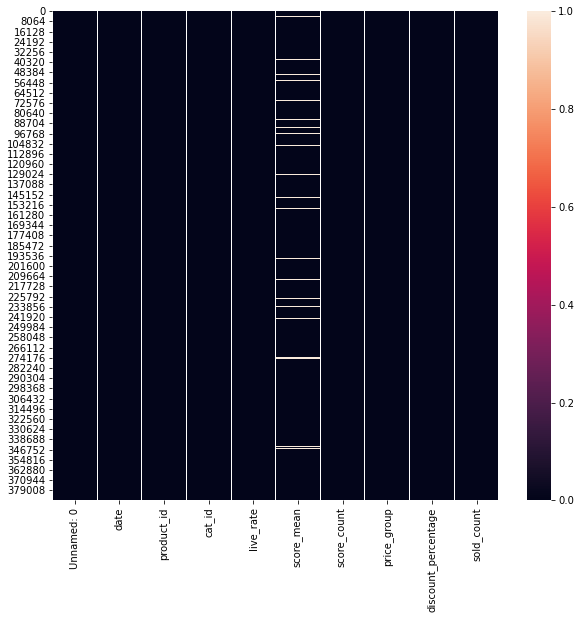

In [4]:
plt.figure(figsize=(10,9))
sns.heatmap(replenishment_df.isnull())

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'product_id'}>,
        <AxesSubplot:title={'center':'cat_id'}>],
       [<AxesSubplot:title={'center':'live_rate'}>,
        <AxesSubplot:title={'center':'score_mean'}>,
        <AxesSubplot:title={'center':'score_count'}>],
       [<AxesSubplot:title={'center':'price_group'}>,
        <AxesSubplot:title={'center':'discount_percentage'}>,
        <AxesSubplot:title={'center':'sold_count'}>]], dtype=object)

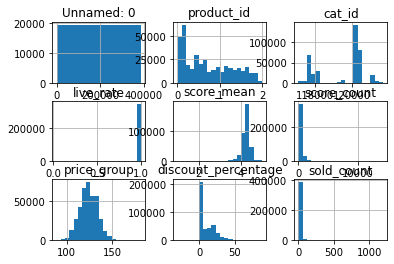

In [5]:
replenishment_df.hist(bins=20)

<AxesSubplot:>

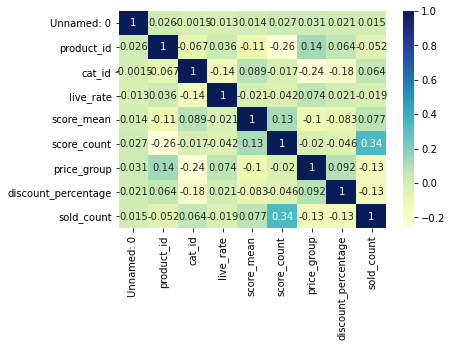

In [6]:
sns.heatmap(replenishment_df.corr(), cmap="YlGnBu", annot=True)

In [7]:
replenishment_df.drop('score_mean', inplace=True, axis=1)

In [31]:
replenishment_df.head()

,Unnamed: 0,date,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count
0,0,20180630,11260680,120456,0.625000,4.2484,306.0,116.0,10.0,0.0
1,1,20180630,4422878,120439,0.608695,4.3027,598.0,111.0,3.0,5.0
2,2,20180630,4429950,121410,1.000000,3.9568,879.0,134.0,32.0,0.0
3,3,20180630,4430741,118147,1.000000,4.2335,394.0,121.0,0.0,0.0
4,4,20180630,4431882,120456,1.000000,4.1695,236.0,116.0,0.0,0.0


In [35]:
replenishment_df.dropna()

,Unnamed: 0,date,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count
0,0,20180630,11260680,120456,0.625000,4.2484,306.0,116.0,10.0,0.0
1,1,20180630,4422878,120439,0.608695,4.3027,598.0,111.0,3.0,5.0
2,2,20180630,4429950,121410,1.000000,3.9568,879.0,134.0,32.0,0.0
3,3,20180630,4430741,118147,1.000000,4.2335,394.0,121.0,0.0,0.0
4,4,20180630,4431882,120456,1.000000,4.1695,236.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387020,387020,20180907,9978653,121074,1.000000,4.4562,708.0,133.0,0.0,16.0
387021,387021,20180907,9984121,117810,1.000000,4.1921,781.0,127.0,20.0,0.0
387022,387022,20180907,9984781,117746,1.000000,4.2227,229.0,125.0,20.0,0.0
387023,387023,20180907,9989789,120438,1.000000,4.2155,283.0,116.0,0.0,3.0


In [36]:
replenishment_df.dtypes

Unnamed: 0               int64
date                     int64
product_id               int64
cat_id                   int64
live_rate              float64
score_mean             float64
score_count            float64
price_group            float64
discount_percentage    float64
sold_count             float64
dtype: object

In [30]:
replenishment_df['date']= replenishment_df['date'].str.replace("-","").astype(int)

In [45]:
replenishment_df.isnull().sum()

Unnamed: 0             0
date                   0
product_id             0
cat_id                 0
live_rate              0
score_mean             0
score_count            0
price_group            0
discount_percentage    0
sold_count             0
dtype: int64

In [44]:
replenishment_df['score_mean'] = replenishment_df['score_mean'].fillna(0)

In [51]:
from sklearn.model_selection import train_test_split

X = replenishment_df.iloc[: , 1:]
y = replenishment_df['sold_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

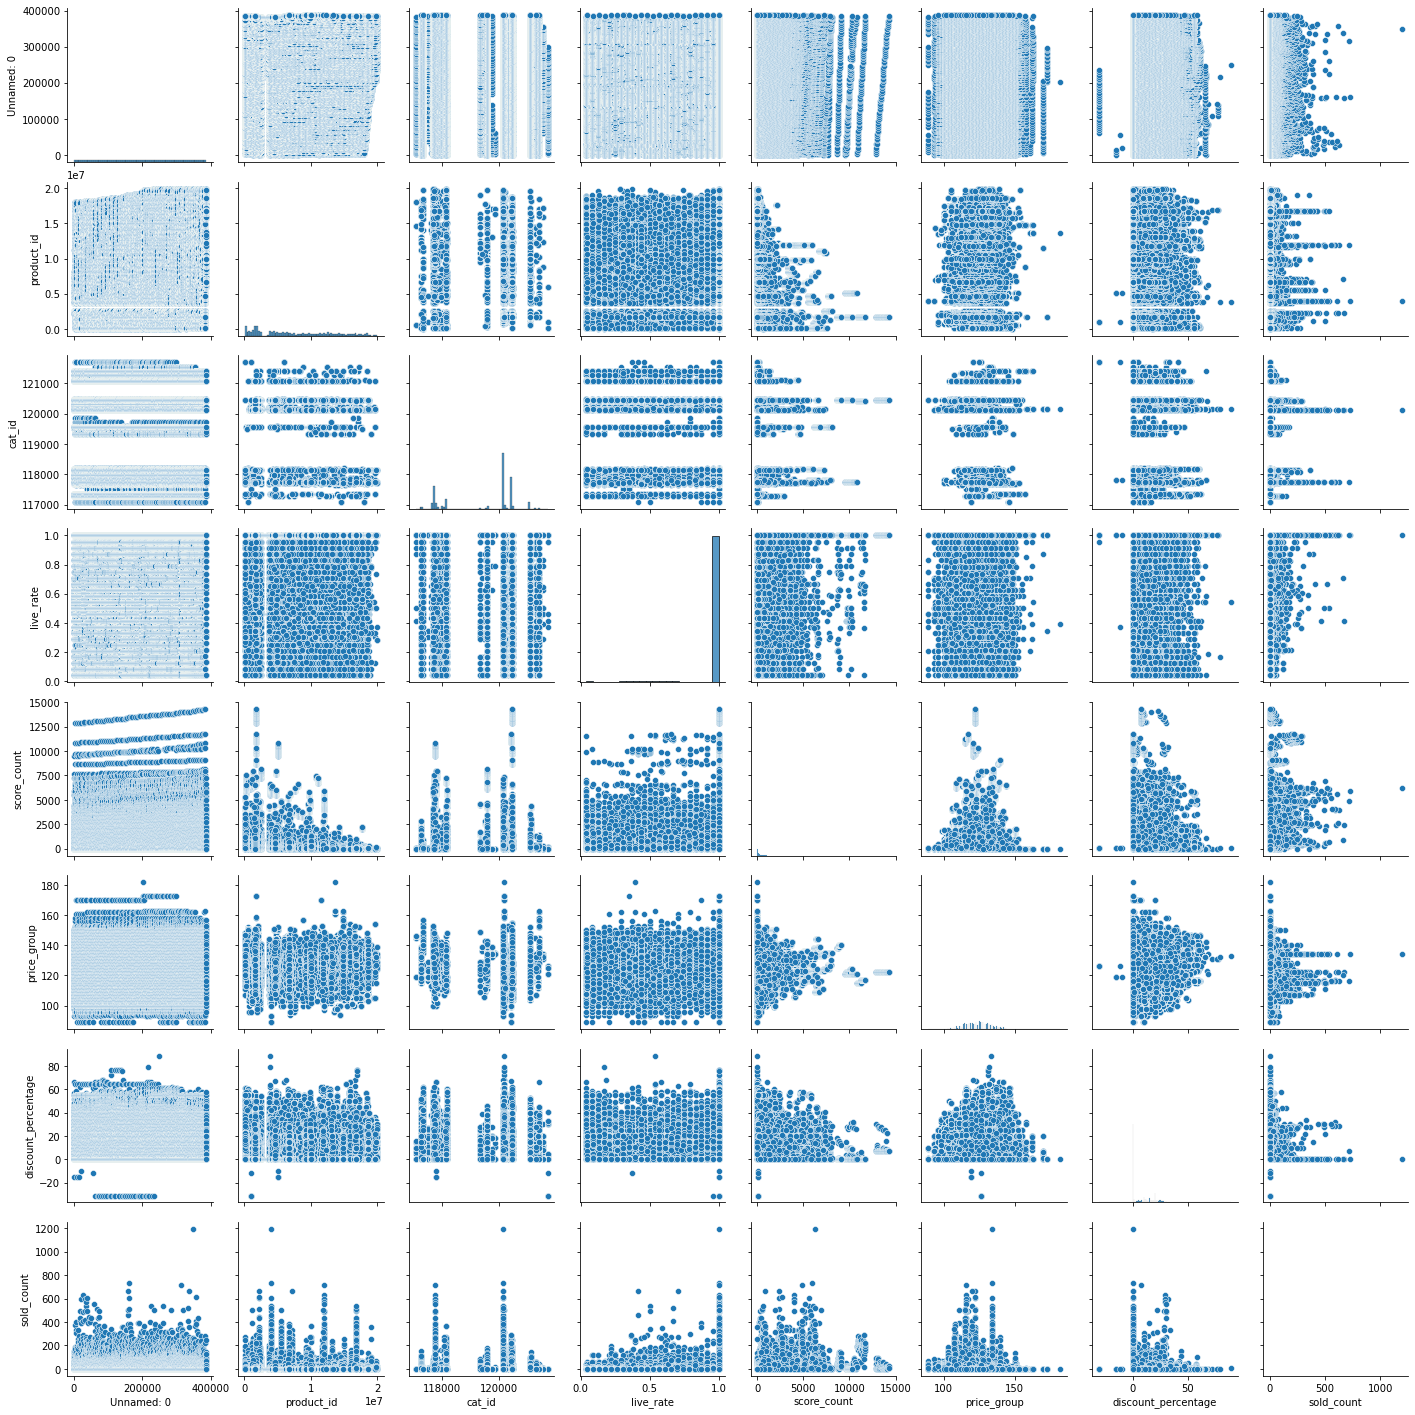

In [16]:
sns.pairplot(replenishment_df)

In [37]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
result = lm.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, result)

1.0

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, result)

8.702718765024778e-26

In [57]:
import math
math.sqrt(mean_squared_error(y_test, result))

2.9500370785847383e-13